## Laboratory 3 - Bayesian Inference ##

# Exercise 1 #

The number of particles emitted by a radioactive source during a fixed interval of time
(∆t = 10 s) follows a Poisson distribution on the parameter µ. The number of particles
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3. 

(a) assuming a positive uniform prior distribution for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R 

(b) assuming a Gamma prior such that the expected value is µ = 3 with a standard
deviation σ = 1,
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R. 

(c) evaluate a 95% credibility interval for the results obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior
distribution, with the same mean and standard deviation


Poisson likelihood for a single measurement:
$$
f(y \mid \mu)=\frac{\mu^{y} \mathrm{e}^{-\mu}}{y!}
$$

For multiple measurements:
$$
f\left(\left\{y_{j}\right\} \mid \mu\right)=\prod_{j=1}^{n} f\left(y_{j} \mid \mu\right) \quad 

In [1]:
# Load required libraries
library(ggplot2)

In [ ]:
dpois()

In [ ]:
likelihood

   [1] 0.000000e+00 9.900498e-03 1.306932e-06 2.911337e-02 8.198737e-10
   [6] 1.981728e-05 5.085528e-07 6.526757e-02 7.877259e-05 8.225381e-02
  [11] 7.540312e-08 1.987259e-04 7.662993e-06 1.141524e-01 3.975865e-04
  [16] 1.291062e-01 7.446146e-07 6.908209e-04 3.653472e-05 1.571222e-01
  [21] 1.091641e-03 1.702227e-01 3.446572e-06 1.611182e-03 1.087434e-04
  [26] 1.947002e-01 2.258667e-03 2.061125e-01 1.083943e-05 3.041567e-03
  [31] 2.500261e-04 2.273686e-01 3.965742e-03 2.372448e-01 2.694966e-05
  [36] 5.035584e-03 4.882618e-04 2.555717e-01 6.254141e-03 2.640522e-01
  [41] 5.720064e-05 7.623240e-03 8.518875e-04 2.797189e-01 9.143600e-03
  [46] 2.869327e-01 1.083509e-04 1.081494e-02 1.368650e-03 3.001869e-01
  [51] 1.263606e-02 3.062527e-01 1.883659e-04 1.460496e-02 2.064642e-03
  [56] 3.173224e-01 1.671891e-02 3.223495e-01 3.062442e-04 1.897453e-02
  [61] 2.963583e-03 3.314440e-01 2.136787e-02 3.355328e-01 4.718133e-04
  [66] 2.389447e-02 4.086299e-03 3.428447e-01 2.654943e-02 3.460

Warning message:
“Removed 1501 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1501 rows containing missing values or values outside the scale range
(`geom_line()`).”


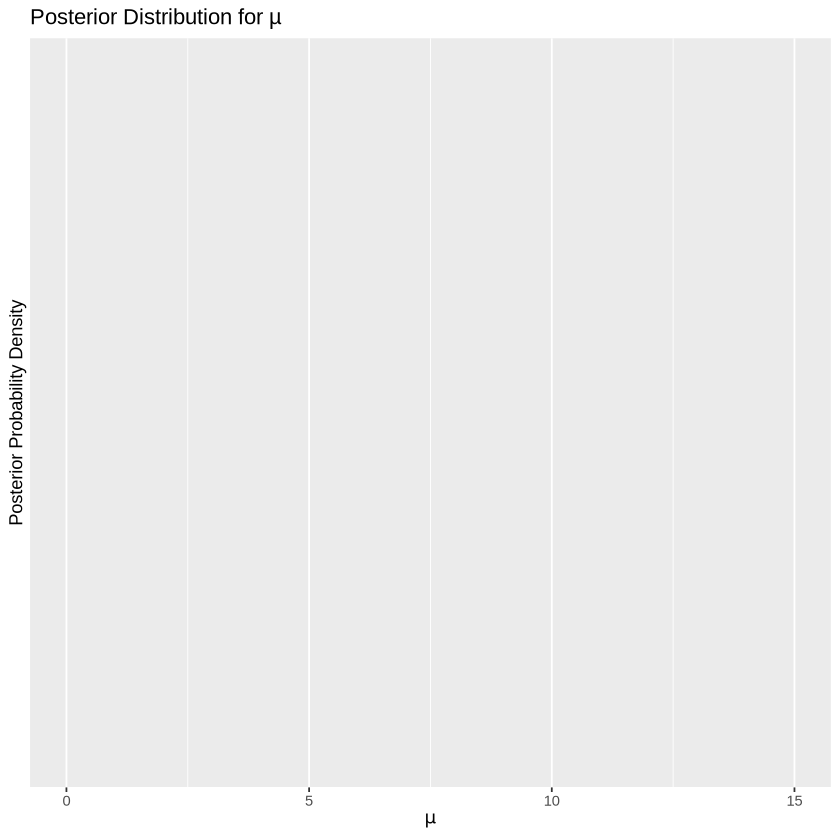

ERROR: Error in var(mu_values, weights = posterior_values): unused argument (weights = posterior_values)


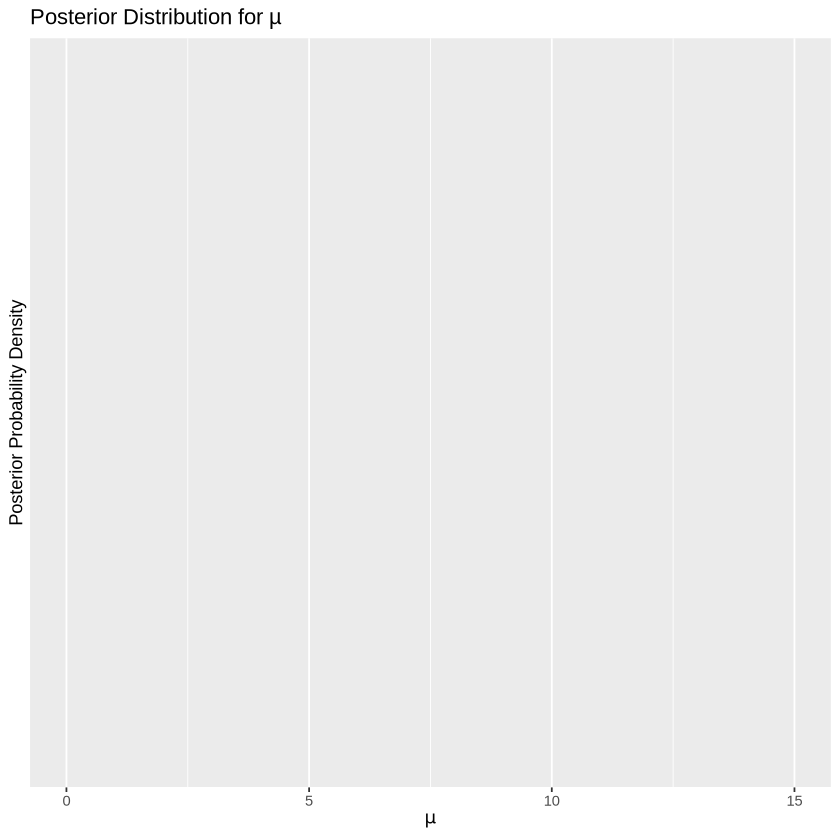

In [10]:
# Define the observed data
data <- c(4, 1, 3, 1, 5, 3)

# Define the likelihood function for Poisson distribution
likelihood <- function(mu, data) {
  prod(dpois(data, lambda = mu))
}

# Define the prior distribution (positive uniform)
prior <- function(mu) {
  ifelse(mu > 0, 1, 0)
}

# Define the posterior distribution (proportional to likelihood * prior)
posterior <- function(mu, data) {
  likelihood(mu, data) * prior(mu)
}

# Calculate the posterior distribution over a range of mu values
mu_values <- seq(0, max(data) + 10, by = 0.01)
print(likelihood(mu_values, data))
posterior_values <- posterior(mu_values, data)
#print(posterior_values)
posterior_values <- posterior_values / sum(posterior_values) # Normalize the posterior


# Plot the posterior distribution
ggplot() +
  geom_line(aes(x = mu_values, y = posterior_values), color = "#46467d", linewidth = 1) +
  labs(x = expression(mu), y = "Posterior Probability Density") +
  ggtitle("Posterior Distribution for µ")

# Plot the posterior distribution
ggplot() +
  geom_line(aes(x = mu_values, y = posterior_values), color = "blue", linewidth = 1) +
  labs(x = expression(mu), y = "Posterior Probability Density") +
  ggtitle("Posterior Distribution for µ")

# Numerically calculate mean, median, and variance
mean_numerical <- mean(mu_values * posterior_values)
median_numerical <- median(mu_values, probs = sum(posterior_values[1:which(cumsum(posterior_values) >= 0.5)[1]]))
variance_numerical <- var(mu_values, weights = posterior_values)

